<a href="https://colab.research.google.com/github/Senuth-Per/ML_Coursework_Banking_Systerm/blob/main/Ml_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Load the dataset with the proper delimiter (semicolon)
data_full_additional = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv', delimiter=';')

# Display basic dataset information
print("Dataset information:")
data_full_additional.info()  # Show data types and non-null counts
print()

# Step 1: Remove duplicates
print(f"Initial dataset shape: {data_full_additional.shape}")
data_full_additional = data_full_additional.drop_duplicates()  # Drop duplicate rows to avoid redundant data
print(f"Shape after removing duplicates: {data_full_additional.shape}")

# Step 2: Handle "unknown" values in categorical features
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

# Add binary flag columns to indicate "unknown" values
for col in categorical_cols:
    if data_full_additional[col].str.contains('unknown').any():
        data_full_additional[f'is_unknown_{col}'] = (data_full_additional[col] == 'unknown').astype(int)  # Create flags for "unknown" values

# Replace "unknown" with NaN for imputation
data_full_additional[categorical_cols] = data_full_additional[categorical_cols].replace('unknown', np.nan)

# Step 3: Handle missing values
# Display columns with missing values before imputation
missing_values = data_full_additional[categorical_cols].isna().sum()
print("Columns with missing values before imputation:")
print(missing_values[missing_values > 0])

# Impute categorical columns with the most frequent value to handle missing data
cat_imputer = SimpleImputer(strategy='most_frequent')
data_full_additional[categorical_cols] = cat_imputer.fit_transform(data_full_additional[categorical_cols])

# Step 4: One-hot encoding for non-ordinal categorical variables
non_ordinal_cols = ['job', 'marital', 'contact', 'poutcome', 'month', 'day_of_week']
data_full_additional = pd.get_dummies(data_full_additional, columns=non_ordinal_cols, drop_first=True)  # Convert categorical data into dummy/indicator variables

# Step 5: Map ordinal categorical variables
# Map ordinal features to numerical values based on logical order
education_mapping = {
    'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4,
    'illiterate': 5, 'professional.course': 6, 'university.degree': 7
}
default_mapping = {'no': 0, 'yes': 1}
housing_mapping = {'no': 0, 'yes': 1}
loan_mapping = {'no': 0, 'yes': 1}

data_full_additional['education'] = data_full_additional['education'].map(education_mapping)
data_full_additional['default'] = data_full_additional['default'].map(default_mapping)
data_full_additional['housing'] = data_full_additional['housing'].map(housing_mapping)
data_full_additional['loan'] = data_full_additional['loan'].map(loan_mapping)

# Display unique values for ordinal features after mapping
print("Unique values for ordinal features after mapping:")
print("Education:", data_full_additional['education'].unique())
print("Default:", data_full_additional['default'].unique())
print("Housing:", data_full_additional['housing'].unique())
print("Loan:", data_full_additional['loan'].unique())

# Step 6: Exclude the 'duration' feature for realistic predictive modeling
# 'duration' is excluded because it is not a feature available before making predictions
data_full_additional = data_full_additional.drop(columns=['duration'])

# Step 7: Scale numerical features
# Standardize numerical columns to have mean 0 and standard deviation 1
numerical_cols = [
    'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]
scaler = StandardScaler()
data_full_additional[numerical_cols] = scaler.fit_transform(data_full_additional[numerical_cols])

# Display summary statistics for numerical features after scaling
print("Summary statistics for numerical features after scaling:")
print(data_full_additional[numerical_cols].describe())

# Step 8: Target encoding
# Encode the target variable ('y') as 1 for 'yes' and 0 for 'no'
data_full_additional['y'] = data_full_additional['y'].map({'yes': 1, 'no': 0})

# Step 9: Add derived features from numerical data
# Create interaction terms to capture potential relationships between variables
data_full_additional['interaction_emp_cons'] = data_full_additional['emp.var.rate'] * data_full_additional['cons.price.idx']
data_full_additional['interaction_nr_employed_conf'] = data_full_additional['nr.employed'] * data_full_additional['cons.conf.idx']

# Step 10: Split features and target variable
# Separate the features (X) and target variable (y)
X_full_additional = data_full_additional.drop(columns=['y'])
y_full_additional = data_full_additional['y']

# Step 11: Train-Test Split
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_full_additional, y_full_additional, test_size=0.2, random_state=42
)

# Save the entire preprocessed dataset
processed_data_path = '/content/drive/MyDrive/banking_system/pre_processed_data.csv'
data_full_additional.to_csv(processed_data_path, index=False)
print(f"Preprocessed dataset saved to {processed_data_path}")

# Display dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load preprocessed dataset from the specified path
data_path = '/content/drive/MyDrive/banking_system/pre_processed_data.csv'
data = pd.read_csv(data_path)

# Split features (X) and target variable (y)
# Features: all columns except 'y'
X = data.drop(columns=['y'])
# Target variable: 'y'
y = data['y']

# Train-Test Split: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler for normalization
scaler = StandardScaler()
# Fit and transform the training data
X_train = scaler.fit_transform(X_train)
# Only transform the testing data
X_test = scaler.transform(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8815 - loss: 0.3270 - val_accuracy: 0.8969 - val_loss: 0.2806
Epoch 2/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9048 - loss: 0.2671 - val_accuracy: 0.8951 - val_loss: 0.2800
Epoch 3/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9028 - loss: 0.2688 - val_accuracy: 0.8944 - val_loss: 0.2795
Epoch 4/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9042 - loss: 0.2624 - val_accuracy: 0.8975 - val_loss: 0.2815
Epoch 5/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9056 - loss: 0.2627 - val_accuracy: 0.8956 - val_loss: 0.2807
Epoch 6/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9053 - loss: 0.2587 - val_accuracy: 0.8965 - val_loss: 0.2801
Epoch 7/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9080 - loss: 0.2518 - val_accuracy: 0.8947 - val_loss: 0.2818
Epoch 8/20
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9088 - loss: 0.2541 - val_accuracy: 0.8937 - val_

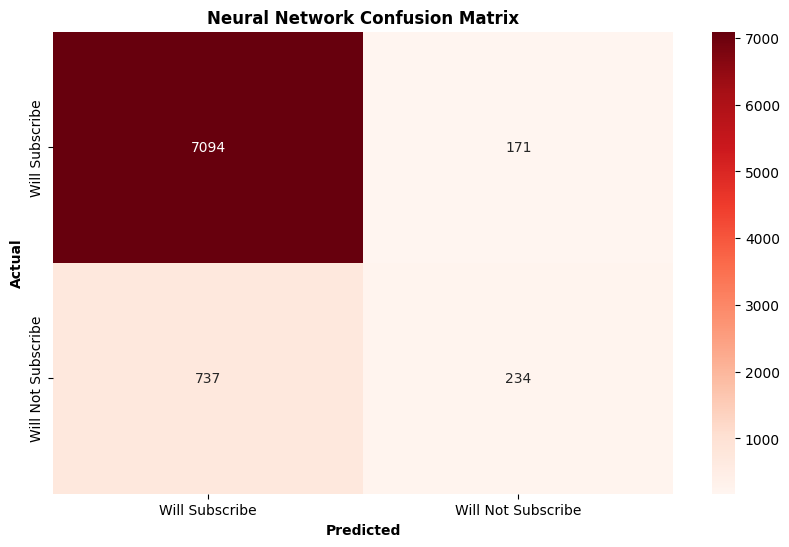

Confusion Matrix Details:
Correctly Predicted 'Will Subscribe' : 7094
Incorrectly Predicted 'Will Not Subscribe' : 171
Incorrectly Predicted 'Will Subscribe' : 737
Correctly Predicted 'Will Not Subscribe' : 234


In [33]:
# Neural Network Implementation using Keras Sequential API
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification (1 neuron)
])

# Compile the model specifying optimizer, loss function, and evaluation metrics
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network on the training data
nn_history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate Neural Network on the test data
# Get predicted probabilities for the test set
nn_y_pred_prob = nn_model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
# Flatten to convert from array to vector
nn_y_pred = (nn_y_pred_prob > 0.5).astype(int).flatten()

# Calculate ROC-AUC score for model evaluation
nn_roc_auc = roc_auc_score(y_test, nn_y_pred_prob)

# Display Neural Network Performance Metrics
print("Neural Network Performance:")
# Detailed classification report including precision, recall, f1-score
print(classification_report(y_test, nn_y_pred))
# Print ROC-AUC score with four decimal places
print(f"ROC-AUC: {nn_roc_auc:.4f}")

# Confusion Matrix for Neural Network Predictions
nn_cm = confusion_matrix(y_test, nn_y_pred)  # Generate confusion matrix from true and predicted labels

# Visualize the confusion matrix using seaborn heatmap for better interpretation
plt.figure(figsize=(10, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Will Subscribe', 'Will Not Subscribe'], yticklabels=['Will Subscribe', 'Will Not Subscribe'])
plt.title("Neural Network Confusion Matrix", fontweight='bold')
plt.xlabel("Predicted", fontweight='bold')
plt.ylabel("Actual" ,fontweight='bold')
plt.show()

# Additional details about model performance
print("Confusion Matrix Details:")
print(f"Correctly Predicted 'Will Subscribe' : {nn_cm[0][0]}")   # Correctly predicted as 'Will Subscribe'
print(f"Incorrectly Predicted 'Will Not Subscribe' : {nn_cm[0][1]}")   # Incorrectly predicted as 'Will Not Subscribe' when it was 'Will Subscribe'
print(f"Incorrectly Predicted 'Will Subscribe' : {nn_cm[1][0]}")   # Incorrectly predicted as 'Will Subscribe' when it was 'Will Not Subscribe'
print(f"Correctly Predicted 'Will Not Subscribe' : {nn_cm[1][1]}")    # Correctly predicted 'Will Not Subscribe'


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7265
           1       0.53      0.28      0.37       971

    accuracy                           0.89      8236
   macro avg       0.72      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236

ROC-AUC: 0.7702


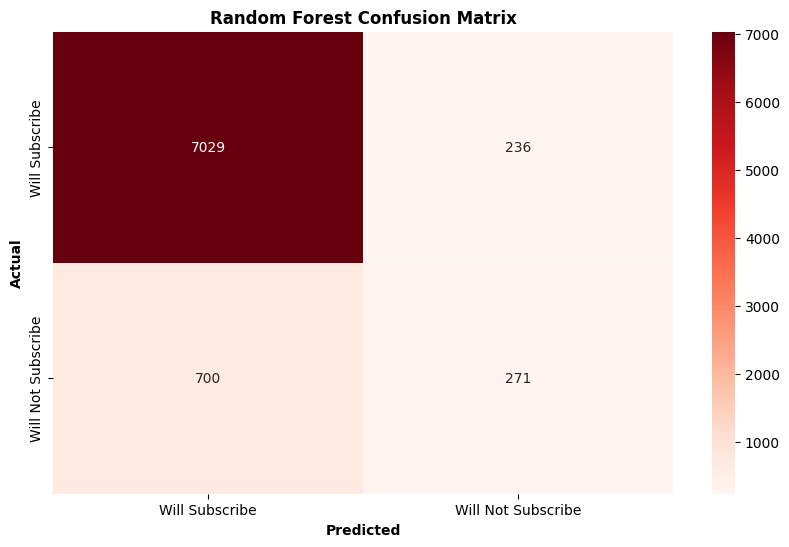

Confusion Matrix Details:
Correctly Predicted 'Will Subscribe' : 7094
Incorrectly Predicted 'Will Not Subscribe' : 171
Incorrectly Predicted 'Will Subscribe' : 737
Correctly Predicted 'Will Not Subscribe' : 234


In [34]:
# Random Forest Implementation
# Initialize the Random Forest Classifier with 100 trees and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data (X_train and y_train)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
# Get predicted probabilities for the positive class (1) on the test set
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Get predicted class labels for the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate ROC AUC score to evaluate model performance
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_prob)

# Display Random Forest Performance Metrics
print("Random Forest Performance:")
print(classification_report(y_test, rf_y_pred))  # Detailed classification report including precision, recall, f1-score
print(f"ROC-AUC: {rf_roc_auc:.4f}")  # Print ROC-AUC score with four decimal places

# Confusion Matrix for Random Forest Predictions
rf_cm = confusion_matrix(y_test, rf_y_pred)  # Generate confusion matrix from true and predicted labels

# Visualize the confusion matrix using seaborn heatmap for better interpretation
plt.figure(figsize=(10, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Will Subscribe', 'Will Not Subscribe'], yticklabels=['Will Subscribe', 'Will Not Subscribe'])
plt.title("Random Forest Confusion Matrix", fontweight='bold')
plt.xlabel("Predicted", fontweight='bold')
plt.ylabel("Actual", fontweight='bold')
plt.show()

# Additional details about model performance
print("Confusion Matrix Details:")
print(f"Correctly Predicted 'Will Subscribe' : {nn_cm[0][0]}")   # Correctly predicted as 'Will Subscribe'
print(f"Incorrectly Predicted 'Will Not Subscribe' : {nn_cm[0][1]}")   # Incorrectly predicted as 'Will Not Subscribe' when it was 'Will Subscribe'
print(f"Incorrectly Predicted 'Will Subscribe' : {nn_cm[1][0]}")   # Incorrectly predicted as 'Will Subscribe' when it was 'Will Not Subscribe'
print(f"Correctly Predicted 'Will Not Subscribe' : {nn_cm[1][1]}")    # Correctly predicted 'Will Not Subscribe'


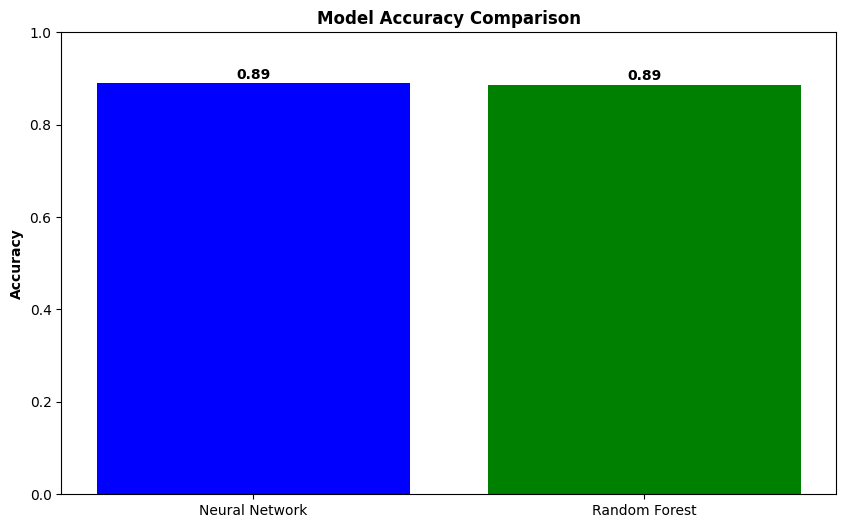

In [35]:
# Calculate accuracy rates for both models
# Accuracy is calculated as the ratio of correctly predicted instances to total instances
nn_accuracy = (nn_cm[0, 0] + nn_cm[1, 1]) / np.sum(nn_cm)  # Neural Network accuracy
rf_accuracy = (rf_cm[0, 0] + rf_cm[1, 1]) / np.sum(rf_cm)  # Random Forest accuracy

# Create a bar chart to compare the accuracy rates of the two models
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.bar(['Neural Network', 'Random Forest'], [nn_accuracy, rf_accuracy], color=['blue', 'green'])
plt.title("Model Accuracy Comparison", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')

# Display the accuracy values above each bar for clarity
for i, v in enumerate([nn_accuracy, rf_accuracy]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')  # Add text above bars

plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better comparison
plt.show()  # Display the plot


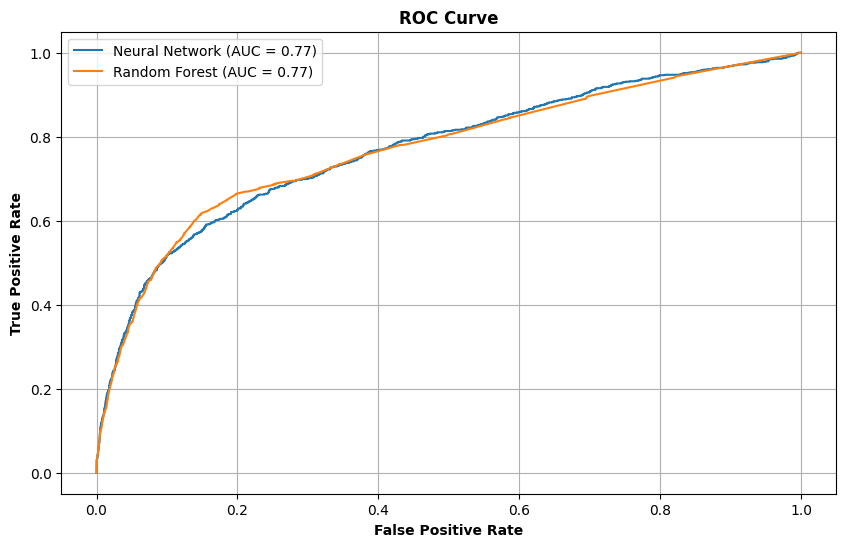

Comparison of Models:
Neural Network AUC: 0.7702
Random Forest AUC: 0.7702


In [36]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_y_pred_prob)  # False Positive Rate and True Positive Rate for Neural Network

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_prob)  # False Positive Rate and True Positive Rate for Random Forest

# Plotting the ROC curves for both models
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')  # Plot Neural Network ROC curve
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')  # Plot Random Forest ROC curve

# Customize the plot with title and labels
plt.title("ROC Curve", fontweight='bold')  # Title of the plot in bold
plt.xlabel("False Positive Rate", fontweight='bold')  # X-axis label in bold
plt.ylabel("True Positive Rate", fontweight='bold')  # Y-axis label in bold

# Add a legend to differentiate between models
plt.legend()

# Add a grid for better readability of the plot
plt.grid()

plt.show()

# Compare Models: Print AUC values for both models
print("Comparison of Models:")
print(f"Neural Network AUC: {nn_roc_auc:.4f}")
print(f"Random Forest AUC: {rf_roc_auc:.4f}")
